In [4]:
from comb_utils import *

ω_start = 193.4160363481703 THz, ω_end = 193.41062074247742 THz
λ_start = 1549.9876000991992 nm, λ_end = 1550.0310006200125 nm
normalized detunings = [ -8 , 20 ] (relevant parameters: δnorm_range)
sweep speed (ω space) = 5415605.69290625 GHz/s 
sweep speed (λ space) = 43400.52081312755 nm/s
real time = 1e-06, normalized time = 193.41448903225805 (relevant parameters: total_time), dt = 0.001
Simulation points = 3223574.0 (relevant parameters: dt)
detuning at start = -1.54731591225 GHz, detuning at end = 3.86828978065625 GHz (relevant parametes: ω_range, λ_range)
polynomial of order 5.
g0 = 0.5099679857188979, Veff = 7.225663103256523e-16, F^2 = 5.318508698363732


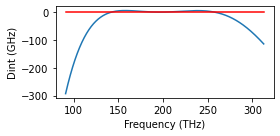

In [5]:
normal = microring(Nmodes=2**9,total_time=1e-6,δnorm_range=[-8,20],pump=50e-3,dt=1e-3,Dint_file='2.500w_58.5r_0.945h.csv',Dint_degrees=5,snapshots=2000,
                 mode_offset=20,R=50e-6,filename='first_sol')

In [52]:
2.5e-19*3e8/1550e-9/(1e-6*2e-6)/3e8

0.08064516129032258

In [53]:
normal.γ

0.06732117812061712

In [6]:
normal.split_step(plan_fft=True)

100%|██████████| 2000/2000 [03:02<00:00, 10.98it/s]


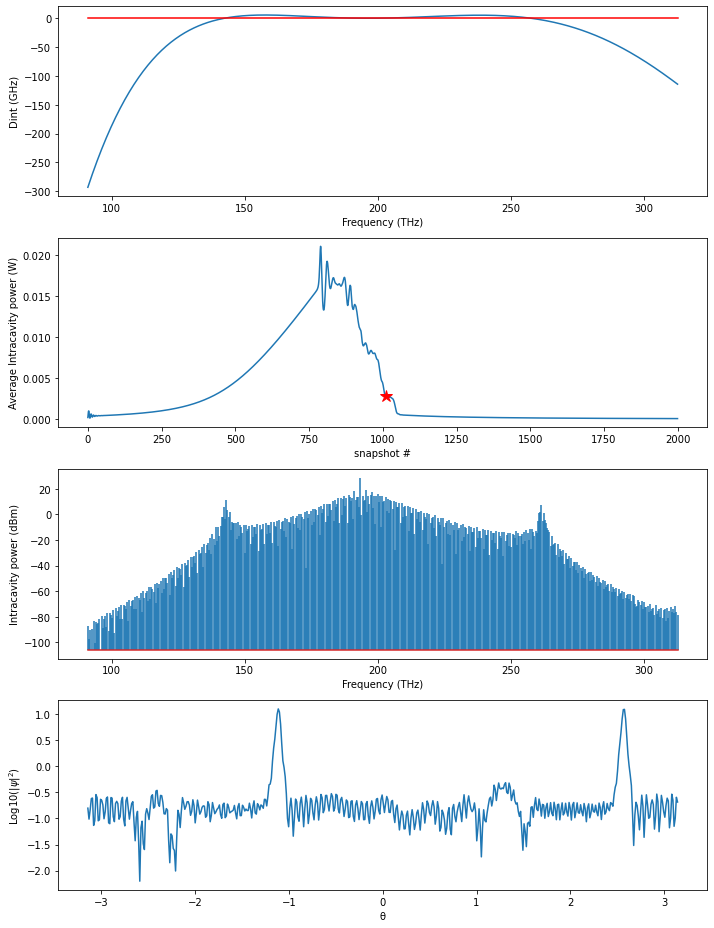

In [9]:
normal.plot_all(1010)

In [61]:
normal.FSR

433758650839.72205

In [70]:
# normal.sol
pump_arr = np.linspace(0,0,normal.Nmodes,dtype='complex')
pump_arr[0] = normal.pump
newsol =pump_arr - normal.sol*np.sqrt(normalization01)*np.sqrt(normal.t_roundtrip*normal.Δωext)#np.sqrt(normal.Δωext*2/normal.Δωtot)

In [26]:
newsol = normal.sol*np.sqrt(normalization01)

<StemContainer object of 3 artists>

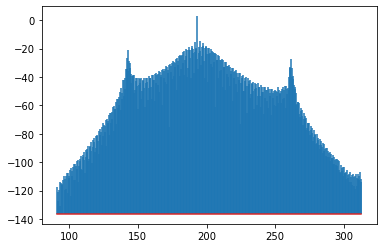

In [71]:
plt.stem(normal.ωarr/1e12,10*np.log10(np.abs(normal.ifftshift(newsol[1010],normal.idx))**2*1e3),
                 bottom=np.min(10*np.log10(np.abs(normal.ifftshift(newsol[1010],normal.idx))**2*1e3)),markerfmt=' ')

<StemContainer object of 3 artists>

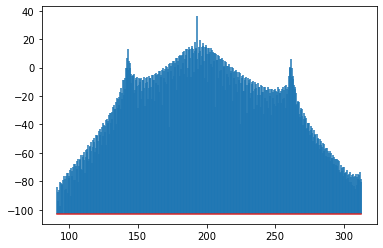

In [23]:
plt.stem(normal.ωarr/1e12,10*np.log10(np.abs(normal.ifftshift(newsol[1010],normal.idx))**2*1e3),
                 bottom=np.min(10*np.log10(np.abs(normal.ifftshift(newsol[1010],normal.idx))**2*1e3)),markerfmt=' ')

In [6]:
np.sqrt(normal.Δωext)

13907.353775332605

In [20]:
np.sqrt(normal.Δωtot)

19667.968325796035

In [7]:
normal.F_arr[0].real*normal.ω0*normal.h/normal.normalization/np.sqrt(normal.Δωext)

4.1387435268276543e-19

In [60]:
1/FSR

2.30542952414685e-12

In [58]:
FSR = normal.c/(normal.ng*normal.L)

In [130]:
normalization00 = 1/(2*normal.g0/(normal.Δωtot**1))

In [10]:
normalization01 = 1/(4*normal.g0/(normal.h*normal.ω0)/(normal.Δωtot**2))/normal.Nmodes

In [173]:
10**14*normal.h*normal.ω0*(FSR*2/normal.Δωtot)

0.02874115248633355

<StemContainer object of 3 artists>

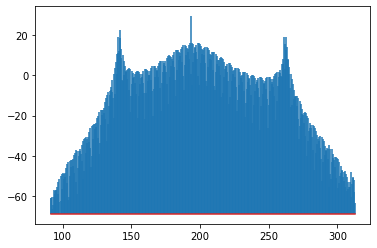

In [174]:
plt.stem(normal.ωarr/1e12,10*np.log10(np.abs(normal.ifftshift(normal.sol[1400]*np.sqrt(normalization01),normal.idx))**2*1e3),
                 bottom=np.min(10*np.log10(np.abs(normal.ifftshift(normal.sol[1400],normal.idx))**2*1e3*normalization01)),markerfmt=' ')

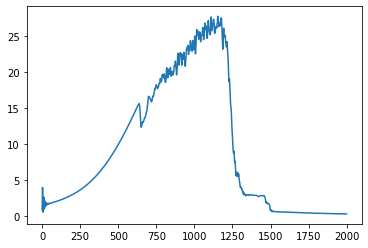

In [176]:
plt.plot(np.sum(np.abs(normal.sol[:])**2,axis=1)*normalization01)